# **Uber Data Analytics using Python**

### Notebook Author : Jaison James

----------------------------------------------------------------------------------------------------------------------------------------------------

#### Connect with me

1) Linkedin : https://www.linkedin.com/in/jaison-james-dev/
2) Github : https://github.com/jayzcodes 
3) Kaggle : https://www.kaggle.com/j4yzd4t4 

----------------------------------------------------------------------------------------------------------------------------------------------------

### Python Libraries Used

----------------------------------------------------------------------------------------------------------------------------------------------------

1) Pandas 
2) Matplotlib

----------------------------------------------------------------------------------------------------------------------------------------------------

Dataset Source : https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data 

Short Desription: The dataset captures 148,767 total disinct bookings across multiple vehicle types and provides a complete view of ride-sharing operations including successful rides, cancellations, customer behaviors, and financial metrics.

-------------------------------------------------------------------------------------------------------------------

KPIs associated with Uber [Used AI to provide the list of common KPIs]


1) Gross Bookings: The total value of all bookings made on the platform. 
2) Monthly Active Platform Consumers (MAPCs): Number of unique customers who completed at least one transaction on the platform in a given month.
3) Trips: The number of completed trips across the platform. 
4) Cancellation Rates: The percentage of booked trips that are canceled.   
5) Booking Completion Rate: The percentage of rides that are successfully completed after booking. 
6) Customer Ratings & Feedback: Monitors overall satisfaction and service quality from customer reviews and ratings. 




-------------------------------------------------------------------------------------------------------------------

Apart from the the KPIs - we will also be performing additional analysis on the data.

## Studying the Data

*Loading the necessary libraries*

In [1]:
import warnings
warnings.filterwarnings('ignore') # To eliminate warnings
import pandas as pd
from matplotlib import pyplot as plt 

*Loading the data into the dataframe*

In [2]:
df = pd.read_csv('ncr_ride_bookings.csv',parse_dates=['Date'])

In [3]:
#We are going to add year, month and quarter columns to facilitate future analysis.

df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month Num'] = pd.DatetimeIndex(df['Date']).month
df['Month'] = df['Date'].dt.strftime('%b')
df['Quarter'] = 'Q'+pd.DatetimeIndex(df['Date']).quarter.astype(str)+'-'+pd.DatetimeIndex(df['Date']).year.astype(str).str[-2:]
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,Mar,Q1-24
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024,11,Nov,Q4-24
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24


*Distinct Total Bookings*

In [4]:
print(f'Distinct Total Bookings :',len(df['Booking ID'].unique()))

Distinct Total Bookings : 148767


*Taking a look at the columns*


In [5]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Year',
       'Month Num', 'Month', 'Quarter'],
      dtype='object')

*Explanation of the columns - Taken from the kaggle website (Source of the dataset)*

| Column Name                        | Description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|
| Date                              | Date of the booking                                                        |
| Time                              | Time of the booking                                                        |
| Booking ID                        | Unique identifier for each ride booking                                    |
| Booking Status                    | Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.) |
| Customer ID                       | Unique identifier for customers                                            |
| Vehicle Type                      | Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan) |
| Pickup Location                   | Starting location of the ride                                              |
| Drop Location                     | Destination location of the ride                                           |
| Avg VTAT                          | Average Vehicle Time at Arrival                                            |
| Avg CTAT                          | Average Customer Time at Arrival                                           |
| Cancelled Rides by Customer       | Customer-initiated cancellation flag                                       |
| Reason for cancelling by Customer | Reason for customer cancellation                                           |
| Cancelled Rides by Driver         | Driver-initiated cancellation flag                                         |
| Driver Cancellation Reason        | Reason for driver cancellation                                             |
| Incomplete Rides                  | Incomplete ride flag                                                       |
| Incomplete Rides Reason           | Reason for incomplete rides                                                |
| Booking Value                     | Total fare amount for the ride                                             |
| Ride Distance                     | Distance covered during the ride (in km)                                   |
| Driver Ratings                    | Rating given to driver (1-5 scale)                                         |
| Customer Rating                   | Rating given by customer (1-5 scale)                                       |
| Payment Method                    | Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)  |


*In addition to the above - We created the following derived columns - Month,Month Number, Year and Quarter*

*Taking a look at the first 5 and last 5 records to get an understanding of the dataset.*

In [6]:
# First 5 records
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,Mar,Q1-24
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024,11,Nov,Q4-24
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24


In [7]:
#Last 5 records
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,806.0,21.19,4.6,4.9,Credit Card,2024,3,Mar,Q1-24


*Number of rows and columns*

In [8]:
print('Number of Rows and columns : ',df.shape)

Number of Rows and columns :  (150000, 25)


*Overview of the dataset*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

---------------------------------------------------------------------------------------------------------------------------------------------------

##### **Performing preliminary analysis based on the booking status**

*Identifying the distinct booking statuses.*

In [10]:
df['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

*Number of Bookings per categories*

In [11]:
df_booking_status = df.groupby('Booking Status')['Booking ID'].nunique().reset_index()
df_booking_status.rename(columns=({'Booking ID':'Number of Bookings'}),inplace=True)
df_booking_status.sort_values(by='Number of Bookings',ascending=False,inplace=True)
df_booking_status['Number of Bookings'] = df_booking_status['Number of Bookings']/1000
df_booking_status['Number of Bookings'] = df_booking_status['Number of Bookings'].round(2)
df_booking_status

,Booking Status,Number of Bookings
2,Completed,92.55
1,Cancelled by Driver,26.96
0,Cancelled by Customer,10.50
4,No Driver Found,10.49
3,Incomplete,8.99


*Visualizing the information as a bar chart*

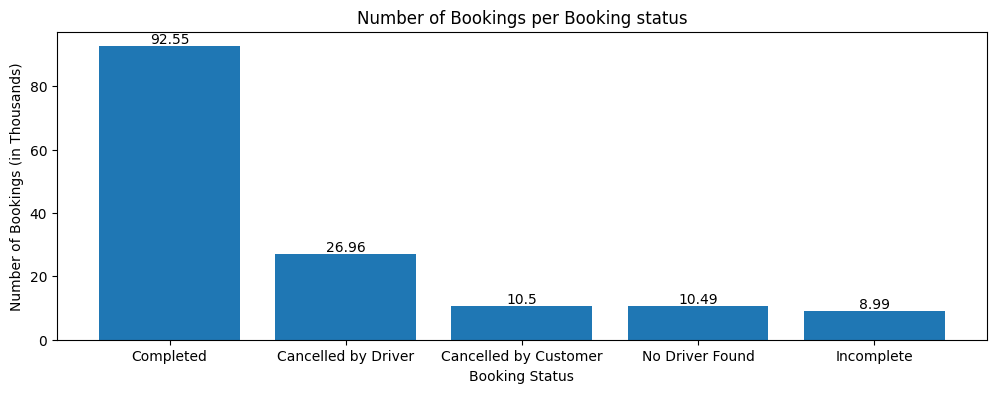

In [12]:
plt.figure(figsize=(12,4))
plt.title('Booking Status')
plt.bar(df_booking_status['Booking Status'],df_booking_status['Number of Bookings'])
plt.ylabel('Number of Bookings (in Thousands)')
plt.xlabel('Booking Status')
for i in range(len(df_booking_status)):
    x = i
    y = df_booking_status['Number of Bookings'].iloc[i]
    plt.text(x,y,y,va='bottom',ha='center')
plt.title('Number of Bookings per Booking status')
plt.show()

We see that the majority of the bookings have a **completed** booking status

*Let's try to identify the reasons for the following booking status categories - Incomplete, Cancelled by Driver and Cancelled by Customer*

*Incomplete Bookings*

In [13]:
df_incomplete = df[df['Booking Status']=='Incomplete']
df_incomplete = df_incomplete.groupby('Incomplete Rides Reason')['Booking ID'].nunique().reset_index()
#Renaming the Booking ID column to counts
df_incomplete.rename(columns={'Booking ID' : 'Count'},inplace=True)
df_incomplete = df_incomplete.sort_values(by='Count')
df_incomplete

,Incomplete Rides Reason,Count
1,Other Issue,2948
2,Vehicle Breakdown,3012
0,Customer Demand,3039


*Incomplete Rides - Visualized as a Horizontal Bar Chart*

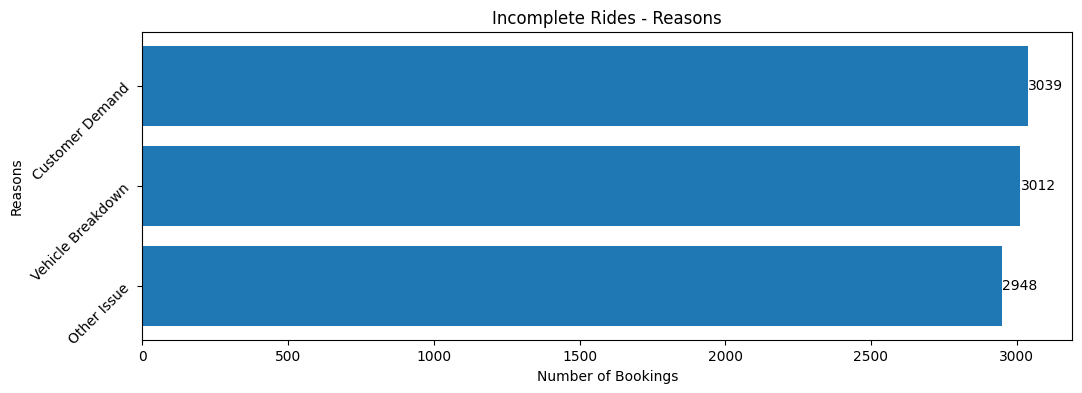

In [14]:
plt.figure(figsize=(12,4))
plt.barh(df_incomplete['Incomplete Rides Reason'],df_incomplete['Count'])
for i in range(len(df_incomplete)):
    x = df_incomplete['Count'].iloc[i] 
    y = i                               
    label = round(x, 2)
    plt.text(x + 1, y, label, va='center')  
plt.title('Incomplete Rides - Reasons')
plt.xlabel('Number of Bookings')
plt.ylabel('Reasons')
plt.yticks(rotation=45)
plt.show()

*Cancelled by Driver*

In [15]:
df_cancelled_driver = df[df['Booking Status'] == 'Cancelled by Driver']
df_cacelled_driver_reason = df_cancelled_driver.groupby('Driver Cancellation Reason')['Booking ID'].nunique().reset_index()
df_cacelled_driver_reason = df_cacelled_driver_reason.rename(columns={'Booking ID':'Count'})
df_cacelled_driver_reason = df_cacelled_driver_reason.sort_values(by='Count')
df_cacelled_driver_reason

,Driver Cancellation Reason,Count
1,More than permitted people in there,6684
2,Personal & Car related issues,6724
3,The customer was coughing/sick,6751
0,Customer related issue,6835


*Cancelled by Driver - Visualized as a Horizontal Bar Chart*

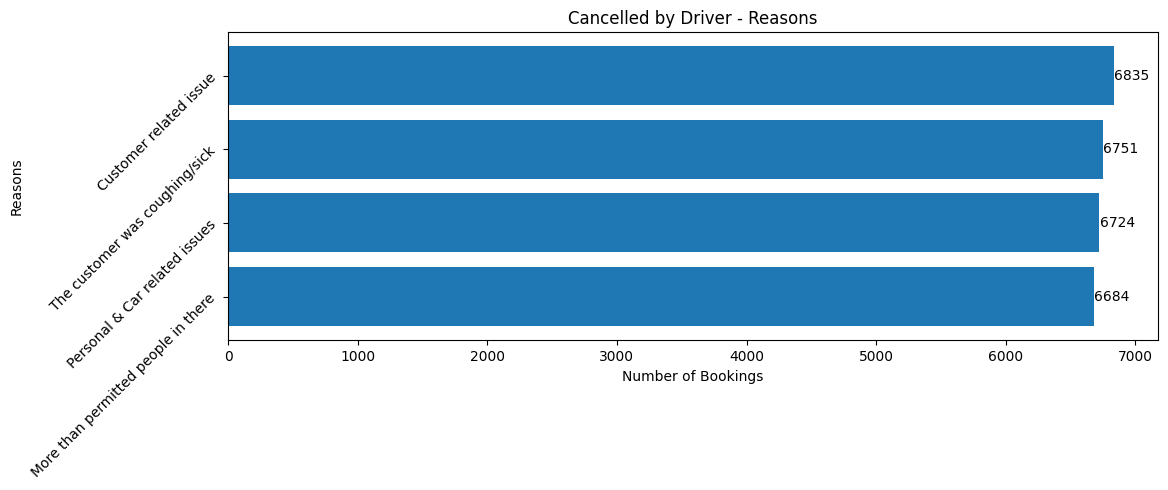

In [16]:
plt.figure(figsize=(12,4))
plt.barh(df_cacelled_driver_reason['Driver Cancellation Reason'],df_cacelled_driver_reason['Count'])
plt.title('Cancelled by Driver - Reasons')
for i in range(len(df_cacelled_driver_reason)):
    x = df_cacelled_driver_reason['Count'].iloc[i]
    y = i 
    plt.text(x+1,y,x,va='center')
plt.xlabel('Number of Bookings')
plt.ylabel('Reasons')
plt.yticks(rotation=45)
plt.show()

*Cancelled by Customer*

In [17]:
df_cancelled_customer = df[df['Booking Status']=='Cancelled by Customer']
df_cancelled_customer 

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
18,2024-11-24,09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,11,Nov,Q4-24
39,2024-09-10,13:02:42,"""CNR4218487""",Cancelled by Customer,"""CID3037053""",Bike,Noida Extension,Udyog Vihar Phase 4,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,9,Sep,Q3-24
46,2024-08-02,07:17:07,"""CNR4862806""",Cancelled by Customer,"""CID7875150""",Auto,Shastri Park,Anand Vihar ISBT,11.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,8,Aug,Q3-24
62,2024-02-09,11:15:59,"""CNR2497989""",Cancelled by Customer,"""CID5007066""",Auto,Karkarduma,IGI Airport,16.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,2,Feb,Q1-24
78,2024-11-25,08:29:14,"""CNR2601752""",Cancelled by Customer,"""CID9283370""",Go Sedan,Sadar Bazar Gurgaon,Indraprastha,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,11,Nov,Q4-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149943,2024-05-01,16:39:56,"""CNR3486851""",Cancelled by Customer,"""CID7572575""",Bike,IGNOU Road,Kadarpur,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,5,May,Q2-24
149952,2024-04-10,09:33:06,"""CNR8257559""",Cancelled by Customer,"""CID1017725""",Auto,Pitampura,IGNOU Road,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,4,Apr,Q2-24
149956,2024-10-10,18:34:10,"""CNR6030764""",Cancelled by Customer,"""CID6873715""",Go Sedan,Hauz Rani,Dilshad Garden,13.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,10,Oct,Q4-24
149963,2024-02-04,10:51:54,"""CNR4272547""",Cancelled by Customer,"""CID2998831""",Auto,Jahangirpuri,Lal Quila,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,2,Feb,Q1-24


In [18]:
#Identifying distinct reasons
df_cancelled_customer['Reason for cancelling by Customer'].unique()

array(['Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [19]:
df_cancelled_customer_reason = df_cancelled_customer.groupby('Reason for cancelling by Customer')['Booking ID'].nunique().reset_index()
df_cancelled_customer_reason = df_cancelled_customer_reason.rename(columns={'Booking ID':'Count'})
df_cancelled_customer_reason = df_cancelled_customer_reason.sort_values(by='Count')
df_cancelled_customer_reason

,Reason for cancelling by Customer,Count
0,AC is not working,1155
2,Driver asked to cancel,2295
3,Driver is not moving towards pickup location,2335
1,Change of plans,2353
4,Wrong Address,2362


*Cancelled by Customer - Visualized*

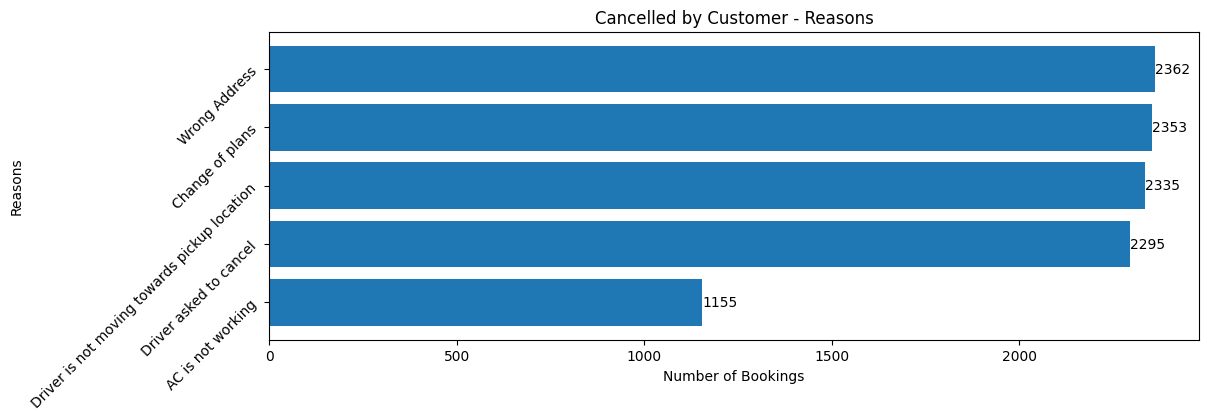

In [20]:
plt.figure(figsize=(12,4))
plt.barh(df_cancelled_customer_reason['Reason for cancelling by Customer'],df_cancelled_customer_reason['Count'])
for i in range(len(df_cancelled_customer_reason)):
    x = df_cancelled_customer_reason['Count'].iloc[i]
    y = i 
    plt.text(x+0.25,y,x,va='center')
plt.title('Cancelled by Customer - Reasons')
plt.yticks(rotation=45)
plt.ylabel('Reasons')
plt.xlabel('Number of Bookings')
plt.show()

## Computing the KPIs

### 1) Gross Bookings 

Definition : The total value of all bookings in the platform.(We are only going to include completed bookings and their corresponding Booking Value)

*Assumption : Since the dataset doesnot contain the other attributes like tips, tolls, etc we are going to assume that the gross bookings only consists of the total fare amount (booking value)*

Let's create a new datframe which just contains the completed fares

In [21]:
completed_df = df[df['Booking Status']=='Completed'].copy()
completed_df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,316.0,4.85,4.1,4.6,UPI,2024,2,Feb,Q1-24
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,640.0,41.24,4.0,4.1,UPI,2024,6,Jun,Q2-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24


In [22]:
#Performing data cleaning on this
#Let's use the info method once again.
completed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               93000 non-null  datetime64[ns]
 1   Time                               93000 non-null  object        
 2   Booking ID                         93000 non-null  object        
 3   Booking Status                     93000 non-null  object        
 4   Customer ID                        93000 non-null  object        
 5   Vehicle Type                       93000 non-null  object        
 6   Pickup Location                    93000 non-null  object        
 7   Drop Location                      93000 non-null  object        
 8   Avg VTAT                           93000 non-null  float64       
 9   Avg CTAT                           93000 non-null  float64       
 10  Cancelled Rides by Customer        0 n

*Inference - Quality of the data is good. We will proceed with the analysis*

#### Analysis

The total gross booking

In [23]:
print('Total Gross Booking is : ',completed_df['Booking Value'].sum())

Total Gross Booking is :  47260574.0


##### Analysis 1.1 - Gross Bookings by Vehicle Type

In [24]:
df_vehicle_type = completed_df.groupby('Vehicle Type')['Booking Value'].sum().reset_index()
df_vehicle_type.sort_values(by='Booking Value',inplace=True)
df_vehicle_type['Booking Value'] = (df_vehicle_type['Booking Value']/1000000).round(2)
df_vehicle_type


,Vehicle Type,Booking Value
5,Uber XL,1.41
6,eBike,3.30
4,Premier Sedan,5.73
1,Bike,7.14
3,Go Sedan,8.54
2,Go Mini,9.41
0,Auto,11.73


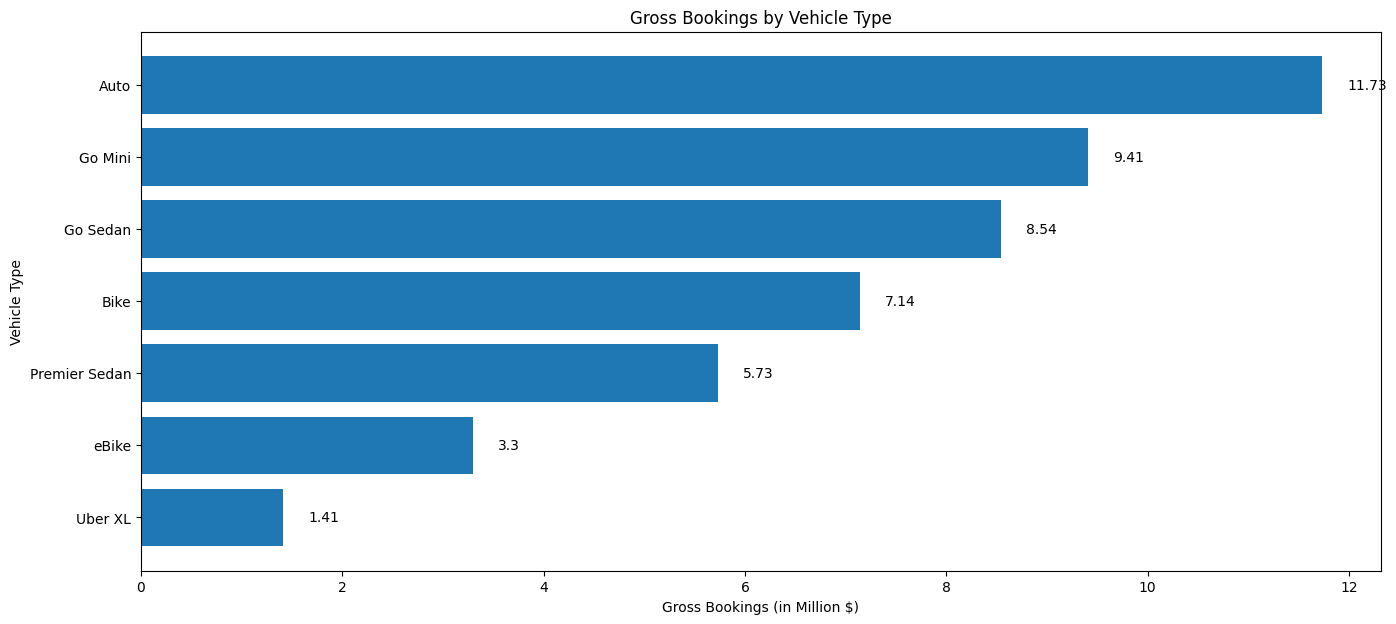

In [25]:
#We are going to present this information as a horizontal bar chart
plt.figure(figsize=(16,7))
bars = plt.barh(df_vehicle_type['Vehicle Type'], df_vehicle_type['Booking Value'])
plt.title('Gross Bookings by Vehicle Type')
plt.xlabel('Gross Bookings (in Million $)')
plt.ylabel('Vehicle Type')
for bar in bars:
    plt.text(bar.get_width()+0.25, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center')
plt.show()

##### Analysis 1.2 - Gross Bookings by Month

In [26]:
#We see that we are only having 2024 data
print(completed_df['Year'].unique())

[2024]


Let's create a line chart that shows the trend of gross bookings by month

In [27]:
sub_df_sorted = completed_df.sort_values(by='Month Num')
sub_df_sorted
df_grossbookings_month = sub_df_sorted.groupby(['Month Num','Month'])['Booking Value'].sum().reset_index()
df_grossbookings_month['Booking Value'] = (df_grossbookings_month['Booking Value']/1000000).round(2)
df_grossbookings_month


,Month Num,Month,Booking Value
0,1,Jan,4.00
1,2,Feb,3.76
2,3,Mar,4.17
3,4,Apr,3.89
4,5,May,3.94
5,6,Jun,3.96
6,7,Jul,3.96
7,8,Aug,3.87
8,9,Sep,3.82
9,10,Oct,4.01


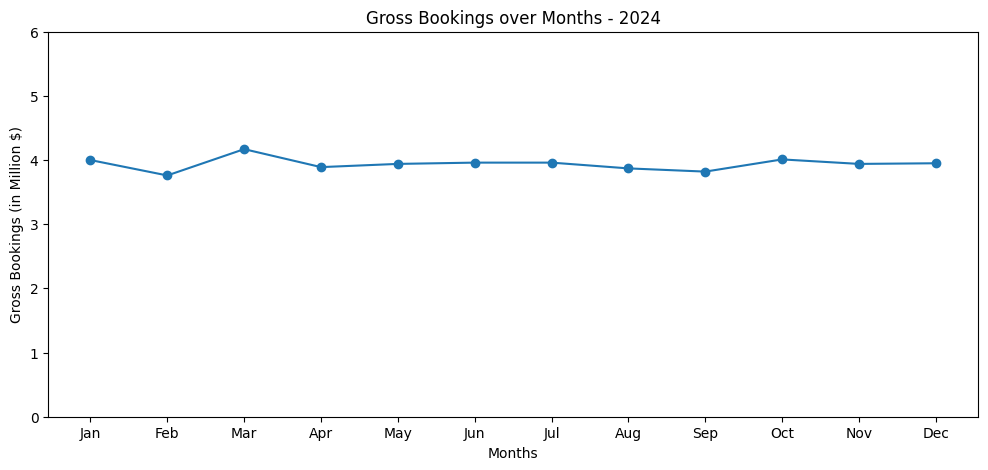

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df_grossbookings_month['Month'],df_grossbookings_month['Booking Value'],marker='o')
plt.xlabel('Months')
plt.ylabel('Gross Bookings (in Million $)')
plt.ylim(bottom=0,top=6)
plt.title('Gross Bookings over Months - 2024')
plt.show()

##### Analysis 1.3 - Gross Bookings by Quarter

Let's create a line chart that shows the trend of gross bookings by quarter in 2024

In [29]:
df_grossbookings_quarter = completed_df.groupby('Quarter')['Booking Value'].sum().reset_index()
df_grossbookings_quarter['Booking Value'] = df_grossbookings_quarter['Booking Value'] / 1000000
df_grossbookings_quarter['Booking Value'] = df_grossbookings_quarter['Booking Value'].round(2)
df_grossbookings_quarter

,Quarter,Booking Value
0,Q1-24,11.93
1,Q2-24,11.78
2,Q3-24,11.65
3,Q4-24,11.89


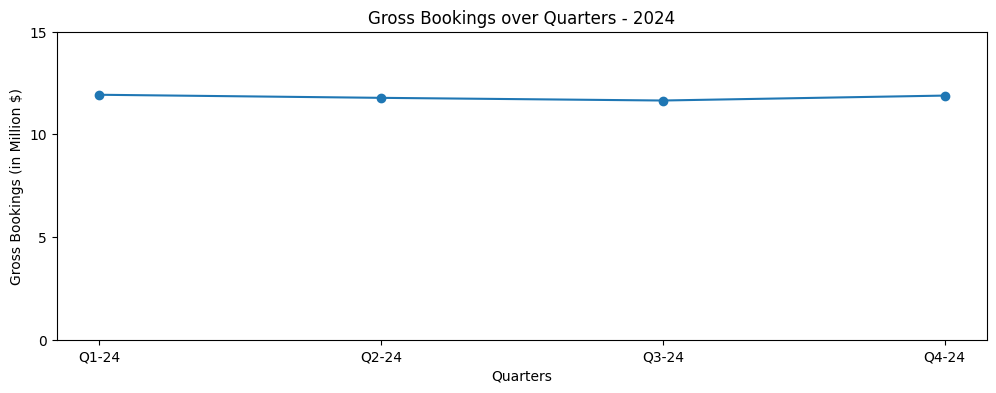

In [30]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(12,4))
plt.plot(df_grossbookings_quarter['Quarter'],df_grossbookings_quarter['Booking Value'],marker='o')
plt.title('Gross Bookings over Quarters - 2024')
plt.ylabel('Gross Bookings (in Million $)')
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
plt.ylim(bottom=0,top=15)
plt.xlabel('Quarters')
plt.show()

##### Analysis 1.4 - Vehicle Type Gross Bookings by Month

Let's create a line chart that shows the trend of gross bookings by month in 2024 for each vehicle type.

In [31]:
df_vehicle_type_gross_bookings_month = completed_df.groupby(['Month Num','Month','Vehicle Type'])['Booking Value'].sum().reset_index()
df_vehicle_type_gross_bookings_month['Booking Value'] = (df_vehicle_type_gross_bookings_month['Booking Value']/1000000).round(2)
df_vehicle_type_gross_bookings_month 

,Month Num,Month,Vehicle Type,Booking Value
0,1,Jan,Auto,0.96
1,1,Jan,Bike,0.63
2,1,Jan,Go Mini,0.80
3,1,Jan,Go Sedan,0.71
4,1,Jan,Premier Sedan,0.51
...,...,...,...,...
79,12,Dec,Go Mini,0.82
80,12,Dec,Go Sedan,0.68
81,12,Dec,Premier Sedan,0.48
82,12,Dec,Uber XL,0.11


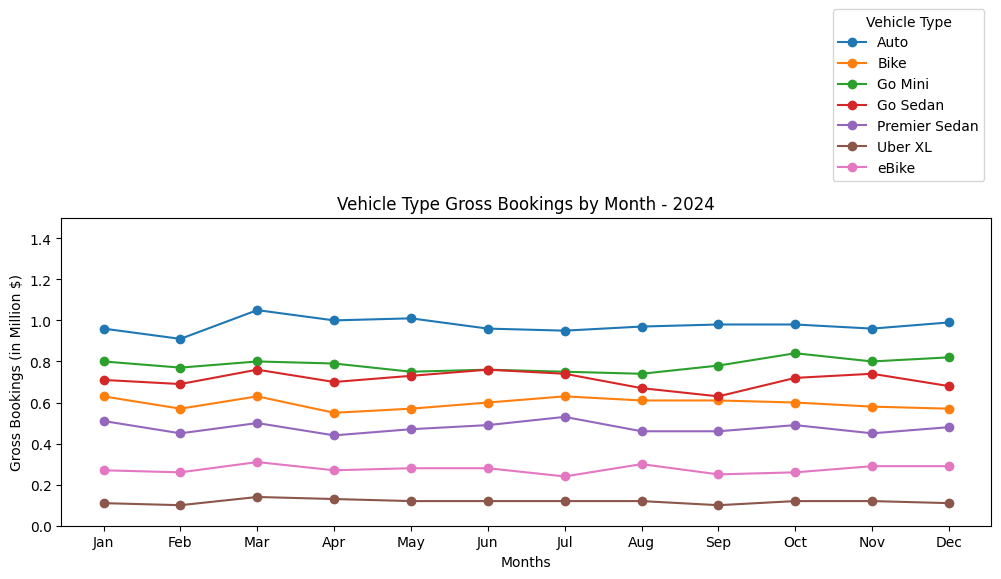

In [32]:
plt.figure(figsize=(12,4))
for key, data in df_vehicle_type_gross_bookings_month.groupby('Vehicle Type'):
    plt.plot(data['Month'],data['Booking Value'],label=key,marker='o')
plt.title('Vehicle Type Gross Bookings by Month - 2024')
plt.xlabel('Months')
plt.ylim(bottom=0,top=1.5)
plt.ylabel('Gross Bookings (in Million $)')
plt.legend(title='Vehicle Type',loc='upper right',bbox_to_anchor=(1, 1.7))
plt.show()

##### Analysis 1.5 - Vehicle Type Gross Bookings by Quarter

Let's create a line chart that shows the trend of gross bookings by quarter in 2024 for each vehicle type.

In [33]:
df_vehicle_type_gross_bookings_quarter = completed_df.groupby(['Quarter','Vehicle Type'])['Booking Value'].sum().reset_index()
df_vehicle_type_gross_bookings_quarter['Booking Value'] = (df_vehicle_type_gross_bookings_quarter['Booking Value']/1000000).round(2)
df_vehicle_type_gross_bookings_quarter

,Quarter,Vehicle Type,Booking Value
0,Q1-24,Auto,2.92
1,Q1-24,Bike,1.83
2,Q1-24,Go Mini,2.38
3,Q1-24,Go Sedan,2.16
4,Q1-24,Premier Sedan,1.46
5,Q1-24,Uber XL,0.35
6,Q1-24,eBike,0.84
7,Q2-24,Auto,2.97
8,Q2-24,Bike,1.73
9,Q2-24,Go Mini,2.30


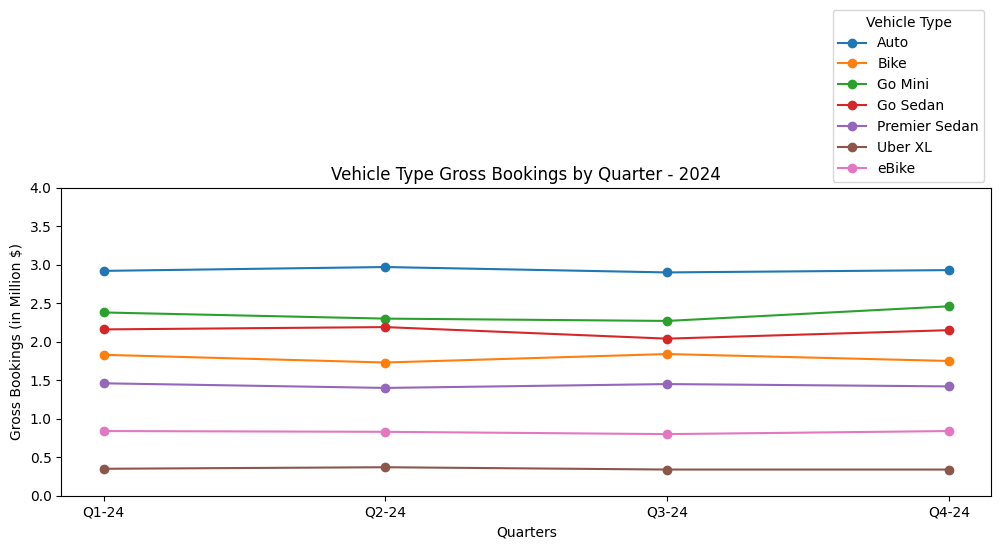

In [34]:
plt.figure(figsize=(12,4))
for key,data in df_vehicle_type_gross_bookings_quarter.groupby('Vehicle Type'):
    plt.plot(data['Quarter'],data['Booking Value'],marker='o',label=key)
plt.legend(title='Vehicle Type',loc='upper right',bbox_to_anchor = (1.0,1.6))
plt.title('Vehicle Type Gross Bookings by Quarter - 2024')
plt.xlabel('Quarters')
plt.ylim(bottom=0,top=4)
plt.ylabel('Gross Bookings (in Million $)')
plt.show()

##### Analysis 1.6 - Gross Bookings by Distance Range 

We are going to create a new categorical column to categorize the Ride Distance column so that the values in them falls into a range to analyze the distribution of gross bookings by distance range.

In [35]:
#Before any of that let's determine the highest and lowest distance travelled respectively.

print('Largest Distance : '+ str(completed_df['Ride Distance'].max()) + ' Km')
print('Smallest Distance : '+ str(completed_df['Ride Distance'].min()) + ' Km')

Largest Distance : 50.0 Km
Smallest Distance : 2.0 Km


In [36]:
#Let's create the new categorical column to facilitate our analysis

bins = [0,10,20,30,40,50]
labels = ['0-10','11-20','21-30','31-40','41-50']

completed_df['Ride Distance Range (in Km)'] = pd.cut(completed_df['Ride Distance'],bins=bins,labels=labels)
completed_df


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter,Ride Distance Range (in Km)
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24,11-20
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24,31-40
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24,41-50
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,316.0,4.85,4.1,4.6,UPI,2024,2,Feb,Q1-24,0-10
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,640.0,41.24,4.0,4.1,UPI,2024,6,Jun,Q2-24,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24,41-50
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24,21-30
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24,11-20
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24,41-50


Let find out the gross bookings per distance range (in Km)

In [37]:
sub_df_gross_bookings_dist_range = completed_df.groupby('Ride Distance Range (in Km)')['Booking Value'].sum().reset_index()
sub_df_gross_bookings_dist_range['Booking Value'] = (sub_df_gross_bookings_dist_range['Booking Value'] / 1000000).round(2)
sub_df_gross_bookings_dist_range.sort_values(by='Booking Value',ascending=False,inplace=True)
sub_df_gross_bookings_dist_range

,Ride Distance Range (in Km),Booking Value
2,21-30,9.99
3,31-40,9.89
4,41-50,9.84
1,11-20,9.74
0,0-10,7.81


Let's represent this information as a bar chart

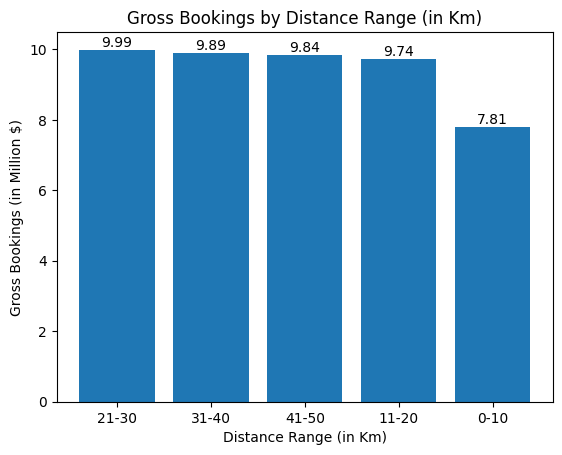

In [38]:
bars = plt.bar(sub_df_gross_bookings_dist_range['Ride Distance Range (in Km)'],sub_df_gross_bookings_dist_range['Booking Value'])
for i in range(len(sub_df_gross_bookings_dist_range)):
    x = i
    y = sub_df_gross_bookings_dist_range['Booking Value'].iloc[i]
    plt.text(x, y, y, ha='center', va='bottom')
plt.title('Gross Bookings by Distance Range (in Km)')
plt.xlabel('Distance Range (in Km)')
plt.ylabel('Gross Bookings (in Million $)')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------

### 2) Monthly Active Platform Consumers (MAPCs)

Definition : Number of unique customers who completed at least one transaction on the platform in a given month.

##### Analysis 2.1 - Overall MAPCs

In [39]:
df_completed = df[df['Booking Status']=='Completed']
df_completed_mapcs_interim = df_completed.groupby(['Month Num','Month','Customer ID'])['Booking ID'].nunique().reset_index()
df_completed_mapcs = df_completed_mapcs_interim.groupby(['Month Num','Month'])['Customer ID'].nunique().reset_index()
df_completed_mapcs.rename(columns={'Customer ID' : 'MAPC'},inplace=True)
df_completed_mapcs['MAPC'] = (df_completed_mapcs['MAPC']/1000).round(2)
df_completed_mapcs

,Month Num,Month,MAPC
0,1,Jan,7.95
1,2,Feb,7.36
2,3,Mar,7.95
3,4,Apr,7.63
4,5,May,7.90
5,6,Jun,7.76
6,7,Jul,7.92
7,8,Aug,7.78
8,9,Sep,7.54
9,10,Oct,7.90


In [40]:
#In 2024 we have following APCs

print('APCs for 2024 :',df_completed_mapcs['MAPC'].sum())

APCs for 2024 : 92.97000000000001


Visualizing to obtain the monthly trend of MAPC

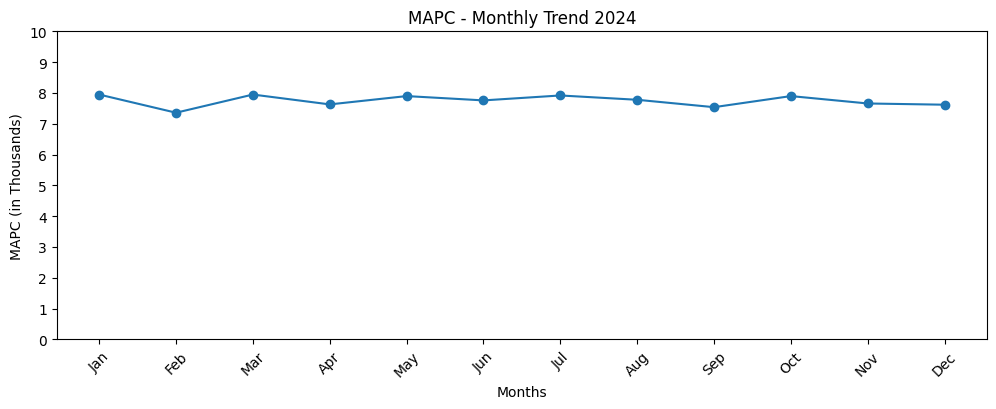

In [41]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(12,4))
plt.plot(df_completed_mapcs['Month'],df_completed_mapcs['MAPC'],marker='o')
plt.title('MAPC - Monthly Trend 2024')
plt.xlabel('Months')
plt.ylabel('MAPC (in Thousands)')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=10)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.show()

##### Analysis 2.2 - MAPC by Vehicle Type

In [42]:
df_completed_mapcs_vehicle_type_interim = df_completed.groupby(['Month Num','Month','Vehicle Type','Customer ID'])['Booking ID'].nunique().reset_index()
df_completed_mapcs_vehicle_type = df_completed_mapcs_vehicle_type_interim.groupby(['Month Num','Month','Vehicle Type'])['Customer ID'].nunique().reset_index()
df_completed_mapcs_vehicle_type.rename(columns={'Customer ID' : 'MAPC'},inplace=True)
df_completed_mapcs_vehicle_type['MAPC'] = (df_completed_mapcs_vehicle_type['MAPC']/1000).round(2)
df_completed_mapcs_vehicle_type

,Month Num,Month,Vehicle Type,MAPC
0,1,Jan,Auto,1.94
1,1,Jan,Bike,1.25
2,1,Jan,Go Mini,1.64
3,1,Jan,Go Sedan,1.38
4,1,Jan,Premier Sedan,0.97
...,...,...,...,...
79,12,Dec,Go Mini,1.57
80,12,Dec,Go Sedan,1.33
81,12,Dec,Premier Sedan,0.94
82,12,Dec,Uber XL,0.22


*Visualizing this information to get a monthly trend*

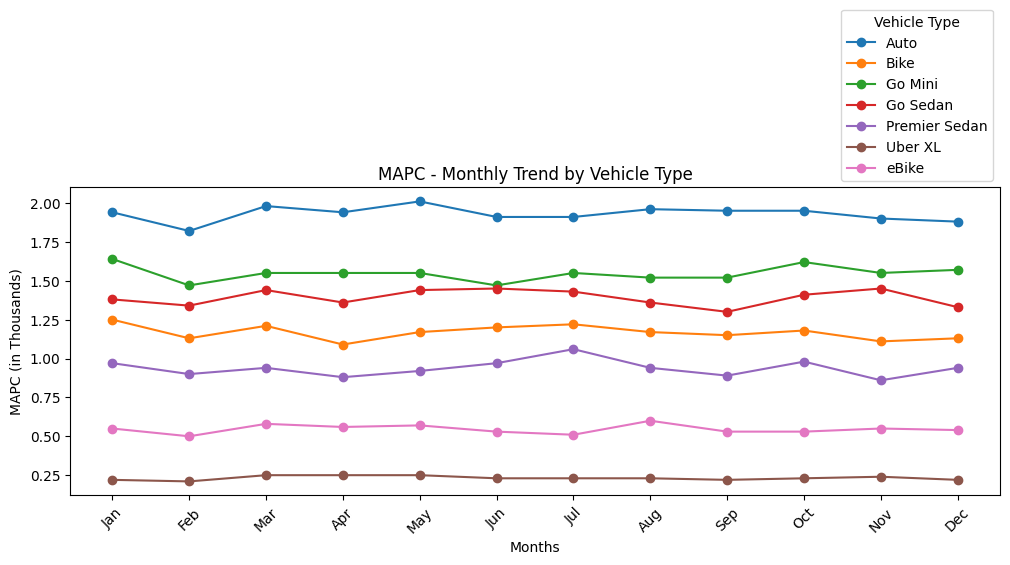

In [43]:
plt.figure(figsize=(12,4))
for key, data in df_completed_mapcs_vehicle_type.groupby('Vehicle Type'):
    label = key 
    x = data['Month']
    y = data['MAPC']
    plt.plot(x,y,label=label,marker='o')
plt.title('MAPC - Monthly Trend by Vehicle Type')
plt.xlabel('Months')
plt.ylabel('MAPC (in Thousands)')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type',loc='upper right',bbox_to_anchor = (1.0,1.6))
plt.show()


### 3) Trips

Definition : The number of completed trips across the platform.

##### Analyis 3.1 - General Monthly Trend

In [44]:
df_completed_trips = df_completed.groupby(['Month Num','Month'])['Booking ID'].nunique().reset_index()
df_completed_trips.rename(columns={'Booking ID' : 'Number of Completed Trips'},inplace=True)
df_completed_trips['Number of Completed Trips'] = (df_completed_trips['Number of Completed Trips']/1000).round(2)
df_completed_trips


,Month Num,Month,Number of Completed Trips
0,1,Jan,7.95
1,2,Feb,7.37
2,3,Mar,7.95
3,4,Apr,7.63
4,5,May,7.90
5,6,Jun,7.76
6,7,Jul,7.92
7,8,Aug,7.78
8,9,Sep,7.54
9,10,Oct,7.90


*Visualizing this information as a line chart to show the Monthly trend*

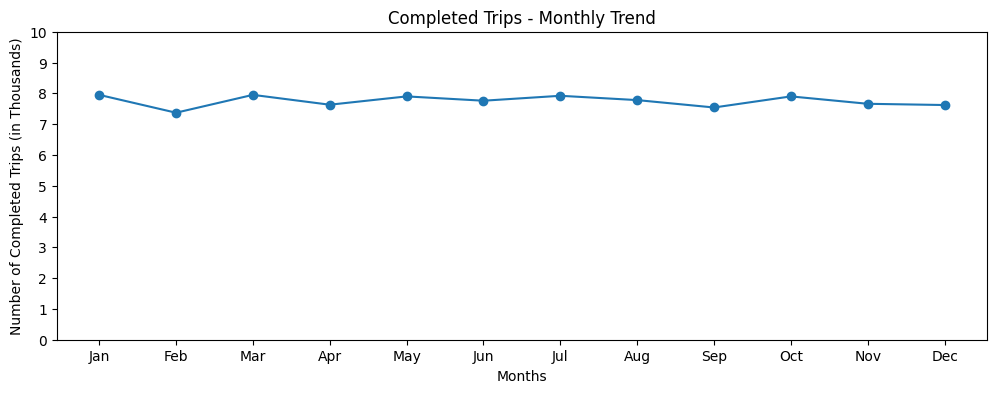

In [45]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(12,4))
plt.plot(df_completed_trips['Month'],df_completed_trips['Number of Completed Trips'],marker='o')
plt.title('Completed Trips - Monthly Trend')
plt.xlabel('Months')
plt.ylabel('Number of Completed Trips (in Thousands)')
plt.ylim(bottom=0,top=10)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.show()

##### Analysis 3.2 - Trips by Vehicle Type - Monthly trend

In [46]:
df_completed_trips_vehicle_type = df_completed.groupby(['Month Num','Month','Vehicle Type'])['Booking ID'].nunique().reset_index()
df_completed_trips_vehicle_type.rename(columns={'Booking ID' : 'Number of Completed Trips'},inplace=True)
df_completed_trips_vehicle_type['Number of Completed Trips'] = (df_completed_trips_vehicle_type['Number of Completed Trips']/1000).round(2)
df_completed_trips_vehicle_type

,Month Num,Month,Vehicle Type,Number of Completed Trips
0,1,Jan,Auto,1.94
1,1,Jan,Bike,1.25
2,1,Jan,Go Mini,1.64
3,1,Jan,Go Sedan,1.38
4,1,Jan,Premier Sedan,0.97
...,...,...,...,...
79,12,Dec,Go Mini,1.57
80,12,Dec,Go Sedan,1.33
81,12,Dec,Premier Sedan,0.94
82,12,Dec,Uber XL,0.22


*Representing the above information as a line chart to see it's monthly trend*

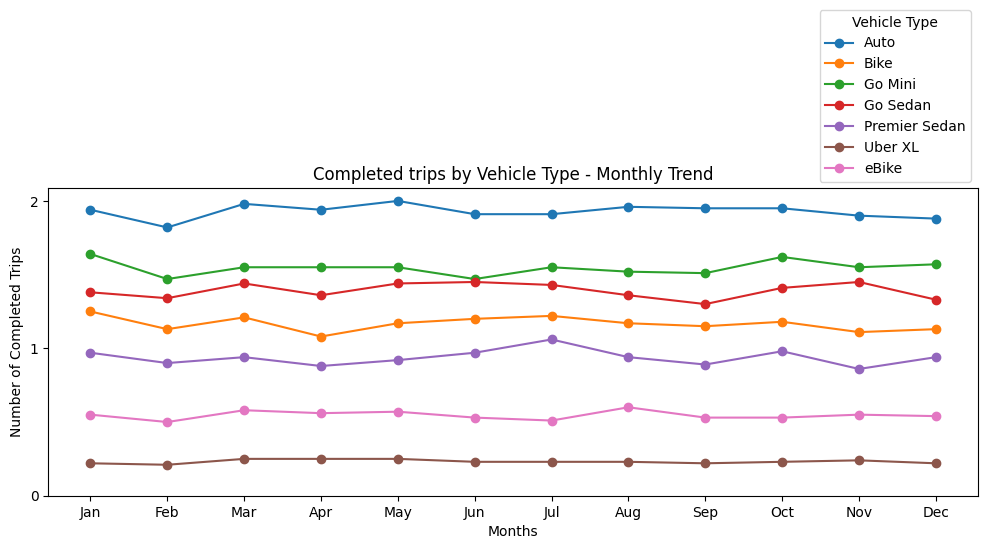

In [47]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(12,4))
for key,data in df_completed_trips_vehicle_type.groupby('Vehicle Type'):
    label = key 
    x = data['Month']
    y = data['Number of Completed Trips']
    plt.plot(x,y,label = label,marker='o')
plt.legend(title='Vehicle Type',loc='upper right',bbox_to_anchor=(1.0,1.6))
plt.title('Completed trips by Vehicle Type - Monthly Trend')
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.ylim(bottom=0)
plt.ylabel('Number of Completed Trips')
plt.xlabel('Months')
plt.show()

### 4) Cancellation Rates

Definition : The percentage of booked trips that are cancelled

In [48]:
df_cancelled = df[(df['Booking Status'] == 'Cancelled by Customer') | (df['Booking Status'] == 'Cancelled by Driver')].copy()
df_cancelled

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
12,2024-06-25,22:44:15,"""CNR4386945""",Cancelled by Driver,"""CID5543520""",eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,6,Jun,Q2-24
17,2024-12-15,15:08:25,"""CNR6739317""",Cancelled by Driver,"""CID8682675""",Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,12,Dec,Q4-24
18,2024-11-24,09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,11,Nov,Q4-24
19,2024-05-24,19:53:57,"""CNR9465840""",Cancelled by Driver,"""CID9046501""",eBike,Pitampura,Rajiv Nagar,10.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,5,May,Q2-24
26,2024-01-26,09:44:00,"""CNR3614535""",Cancelled by Driver,"""CID2507102""",Auto,Cyber Hub,Saket,11.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,1,Jan,Q1-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149965,2024-10-10,21:49:49,"""CNR5276775""",Cancelled by Customer,"""CID9234302""",Auto,Saket A Block,Hero Honda Chowk,18.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,10,Oct,Q4-24
149973,2024-02-06,18:03:44,"""CNR4828704""",Cancelled by Driver,"""CID3769079""",Go Sedan,Bahadurgarh,DLF City Court,6.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,2,Feb,Q1-24
149977,2024-03-02,13:22:23,"""CNR9330412""",Cancelled by Driver,"""CID3815156""",Go Sedan,Pulbangash,Moolchand,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,Mar,Q1-24
149979,2024-10-05,17:30:25,"""CNR8459494""",Cancelled by Driver,"""CID9568404""",Auto,Chirag Delhi,Palam Vihar,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,10,Oct,Q4-24


*Overall cancellation Rate for 2024*

In [49]:
print(f'Cancellation Rate - 2024 :',round(len(df_cancelled['Booking ID'].unique())/len(df['Booking ID'].unique())*100,2))

Cancellation Rate - 2024 : 25.16


##### Analysis 4.1 - Cancellation Rate - Monthly Trend

Count of cancelled bookings per month

In [50]:
df_cancelled_month = df_cancelled.groupby(['Month Num','Month'])['Booking ID'].nunique().reset_index()
df_cancelled_month.rename(columns={'Booking ID':'Number of Cancelled Bookings'},inplace=True)
df_cancelled_month

,Month Num,Month,Number of Cancelled Bookings
0,1,Jan,3216
1,2,Feb,3027
2,3,Mar,3146
3,4,Apr,3000
4,5,May,3235
5,6,Jun,3088
6,7,Jul,3263
7,8,Aug,3185
8,9,Sep,3058
9,10,Oct,3117


Count of Total bookings per month

In [51]:
df_total_bookings_month = df.groupby(['Month Num','Month'])['Booking ID'].nunique().reset_index().copy()
df_total_bookings_month.rename(columns={'Booking ID':'Number of Total Bookings'},inplace=True)
df_total_bookings_month

,Month Num,Month,Number of Total Bookings
0,1,Jan,12855
1,2,Feb,11920
2,3,Mar,12706
3,4,Apr,12192
4,5,May,12768
5,6,Jun,12437
6,7,Jul,12889
7,8,Aug,12624
8,9,Sep,12237
9,10,Oct,12638


*Calculating the cancellation rate*

First, we need to merge the two data frames to have the information in one dataframe to facilitate calculation

In [52]:
df_cancellation_rates = pd.merge(df_total_bookings_month,df_cancelled_month,on=['Month Num','Month'])
df_cancellation_rates['Cancellation Rate'] = (df_cancellation_rates['Number of Cancelled Bookings'] / df_cancellation_rates['Number of Total Bookings'])*100
df_cancellation_rates['Cancellation Rate'] = df_cancellation_rates['Cancellation Rate'].round(2)
df_cancellation_rates

,Month Num,Month,Number of Total Bookings,Number of Cancelled Bookings,Cancellation Rate
0,1,Jan,12855,3216,25.02
1,2,Feb,11920,3027,25.39
2,3,Mar,12706,3146,24.76
3,4,Apr,12192,3000,24.61
4,5,May,12768,3235,25.34
5,6,Jun,12437,3088,24.83
6,7,Jul,12889,3263,25.32
7,8,Aug,12624,3185,25.23
8,9,Sep,12237,3058,24.99
9,10,Oct,12638,3117,24.66


*Visualizing the monthly trend of Cancellation Rate*

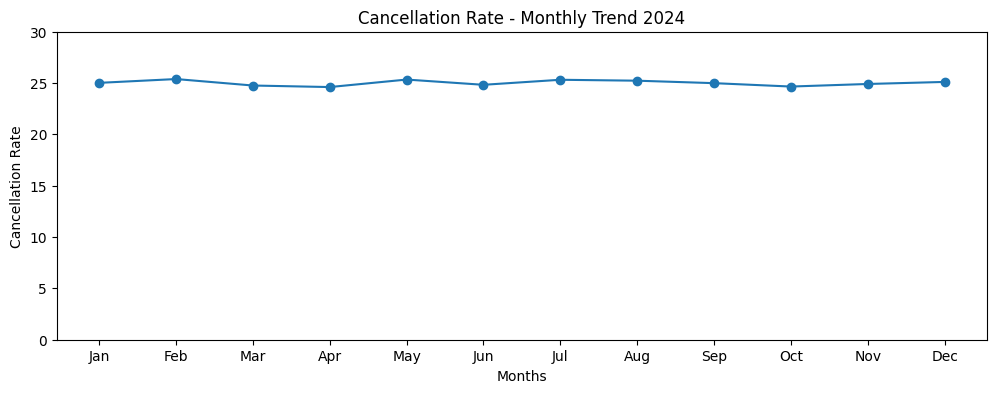

In [53]:
plt.figure(figsize=(12,4))
plt.plot(df_cancellation_rates['Month'],df_cancellation_rates['Cancellation Rate'],marker='o')
plt.title('Cancellation Rate - Monthly Trend 2024')
plt.xlabel('Months')
plt.ylabel('Cancellation Rate')
plt.ylim(bottom=0,top=30)
plt.show()

##### Analysis 4.2 - Cancellation Rate - Quarterly trend

In [54]:
df_cancelled

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
12,2024-06-25,22:44:15,"""CNR4386945""",Cancelled by Driver,"""CID5543520""",eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,6,Jun,Q2-24
17,2024-12-15,15:08:25,"""CNR6739317""",Cancelled by Driver,"""CID8682675""",Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,12,Dec,Q4-24
18,2024-11-24,09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,11,Nov,Q4-24
19,2024-05-24,19:53:57,"""CNR9465840""",Cancelled by Driver,"""CID9046501""",eBike,Pitampura,Rajiv Nagar,10.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,5,May,Q2-24
26,2024-01-26,09:44:00,"""CNR3614535""",Cancelled by Driver,"""CID2507102""",Auto,Cyber Hub,Saket,11.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,1,Jan,Q1-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149965,2024-10-10,21:49:49,"""CNR5276775""",Cancelled by Customer,"""CID9234302""",Auto,Saket A Block,Hero Honda Chowk,18.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,10,Oct,Q4-24
149973,2024-02-06,18:03:44,"""CNR4828704""",Cancelled by Driver,"""CID3769079""",Go Sedan,Bahadurgarh,DLF City Court,6.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,2,Feb,Q1-24
149977,2024-03-02,13:22:23,"""CNR9330412""",Cancelled by Driver,"""CID3815156""",Go Sedan,Pulbangash,Moolchand,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,Mar,Q1-24
149979,2024-10-05,17:30:25,"""CNR8459494""",Cancelled by Driver,"""CID9568404""",Auto,Chirag Delhi,Palam Vihar,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024,10,Oct,Q4-24


*Count of Cancelled Bookings per Quarter*

In [55]:
df_cancelled_quarter = df_cancelled.groupby('Quarter')['Booking ID'].nunique().reset_index()
df_cancelled_quarter.rename(columns={'Booking ID':'Number of Cancelled Bookings'},inplace=True)
df_cancelled_quarter


,Quarter,Number of Cancelled Bookings
0,Q1-24,9383
1,Q2-24,9321
2,Q3-24,9504
3,Q4-24,9271


*Count of Total Bookings per Quarter*

In [56]:
df_total_bookings_quarter = df.groupby('Quarter')['Booking ID'].nunique().reset_index().copy()
df_total_bookings_quarter.rename(columns={'Booking ID':'Number of Total Bookings'},inplace=True)
df_total_bookings_quarter

,Quarter,Number of Total Bookings
0,Q1-24,37427
1,Q2-24,37349
2,Q3-24,37705
3,Q4-24,37207


*Calculating the cancellation rate*

First, we have to merge the data from two dataframes to a single dataframe.

In [57]:
df_cancellation_rates_quarter = pd.merge(df_cancelled_quarter,df_total_bookings_quarter,on='Quarter')
df_cancellation_rates_quarter['Cancellation Rate'] = (df_cancellation_rates_quarter['Number of Cancelled Bookings'] / df_cancellation_rates_quarter['Number of Total Bookings'])*100
df_cancellation_rates_quarter['Cancellation Rate'] = df_cancellation_rates_quarter['Cancellation Rate'].round(2)
df_cancellation_rates_quarter

,Quarter,Number of Cancelled Bookings,Number of Total Bookings,Cancellation Rate
0,Q1-24,9383,37427,25.07
1,Q2-24,9321,37349,24.96
2,Q3-24,9504,37705,25.21
3,Q4-24,9271,37207,24.92


*Visualizing the Quarterly trend using a line chart*

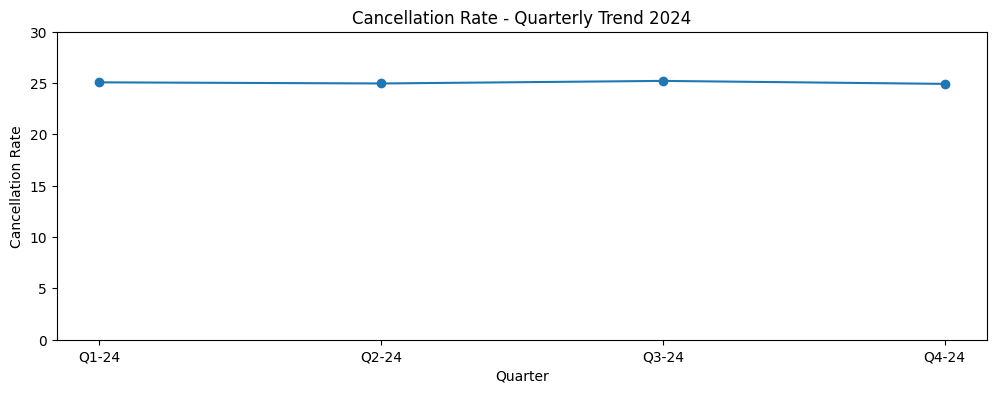

In [58]:
plt.figure(figsize=(12,4))
plt.plot(df_cancellation_rates_quarter['Quarter'],df_cancellation_rates_quarter['Cancellation Rate'],marker='o')
plt.title('Cancellation Rate - Quarterly Trend 2024')
plt.ylim(bottom=0,top=30)
plt.ylabel('Cancellation Rate')
plt.xlabel('Quarter')
plt.show()

### 5) Booking Completion Rates

Booking Completion Rate: The percentage of rides that are successfully completed after booking. 


In [59]:
df_completed

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,316.0,4.85,4.1,4.6,UPI,2024,2,Feb,Q1-24
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,640.0,41.24,4.0,4.1,UPI,2024,6,Jun,Q2-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24


*Overall Booking Completion Rate - 2024*

In [60]:
print(f'Completion Rate - 2024 :',round(len(df_completed['Booking ID'].unique())/len(df['Booking ID'].unique())*100,2))

Completion Rate - 2024 : 62.21


##### Analysis 5.1 - Booking Completion Rate - Monthly Trend

*Count of Completed Bookings per Month*

In [61]:
df_completed_month = df_completed.groupby(['Month Num','Month'])['Booking ID'].nunique().reset_index().copy()
df_completed_month.rename(columns={'Booking ID':'Number of Completed Bookings'},inplace=True)
df_completed_month

,Month Num,Month,Number of Completed Bookings
0,1,Jan,7951
1,2,Feb,7368
2,3,Mar,7950
3,4,Apr,7629
4,5,May,7900
5,6,Jun,7757
6,7,Jul,7924
7,8,Aug,7776
8,9,Sep,7538
9,10,Oct,7901


*Count of Total Bookings per Month*

Since we have already defined the dataframe for total bookings - we are just going to reuse the same

In [62]:
df_total_bookings_month

,Month Num,Month,Number of Total Bookings
0,1,Jan,12855
1,2,Feb,11920
2,3,Mar,12706
3,4,Apr,12192
4,5,May,12768
5,6,Jun,12437
6,7,Jul,12889
7,8,Aug,12624
8,9,Sep,12237
9,10,Oct,12638


*Booking Completion Rate calculation*

For this, we need to merge the two dataframes and combine them into one to facilitate the calculation

In [63]:
df_booking_completion_rate = pd.merge(df_completed_month,df_total_bookings_month,on=['Month Num','Month'])
df_booking_completion_rate['Booking Completion Rate'] = (df_booking_completion_rate['Number of Completed Bookings'] / df_booking_completion_rate['Number of Total Bookings']) * 100
df_booking_completion_rate['Booking Completion Rate'] = df_booking_completion_rate['Booking Completion Rate'].round(2)
df_booking_completion_rate

,Month Num,Month,Number of Completed Bookings,Number of Total Bookings,Booking Completion Rate
0,1,Jan,7951,12855,61.85
1,2,Feb,7368,11920,61.81
2,3,Mar,7950,12706,62.57
3,4,Apr,7629,12192,62.57
4,5,May,7900,12768,61.87
5,6,Jun,7757,12437,62.37
6,7,Jul,7924,12889,61.48
7,8,Aug,7776,12624,61.60
8,9,Sep,7538,12237,61.60
9,10,Oct,7901,12638,62.52


*Visualizing the Monthly trend using line chart*

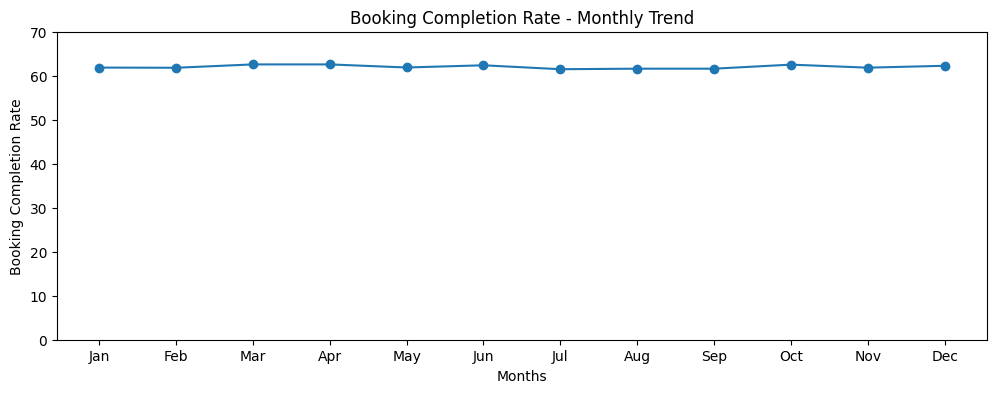

In [64]:
plt.figure(figsize=(12,4))
plt.plot(df_booking_completion_rate['Month'],df_booking_completion_rate['Booking Completion Rate'],marker='o')
plt.ylim(bottom=0,top=70)
plt.title('Booking Completion Rate - Monthly Trend')
plt.ylabel('Booking Completion Rate')
plt.xlabel('Months')
plt.show()

##### Analysis 5.2 - Booking Completion Rate - Quarterly Trend

*Count of Completed Bookings by Quarter*

In [65]:
df_completed_quarter = df_completed.groupby('Quarter')['Booking ID'].nunique().reset_index()
df_completed_quarter.rename(columns={'Booking ID':'Number of Completed Bookings'},inplace=True)
df_completed_quarter

,Quarter,Number of Completed Bookings
0,Q1-24,23251
1,Q2-24,23268
2,Q3-24,23222
3,Q4-24,23154


*Count of Total Bookings by Quarter*

We are going to re-use the total bookings by quarter dataframe which we had created earlier.

In [66]:
df_total_bookings_quarter

,Quarter,Number of Total Bookings
0,Q1-24,37427
1,Q2-24,37349
2,Q3-24,37705
3,Q4-24,37207


*Calculating the Booking Completion Rate*

For this, we need to merge the two dataframes into one to facilitate the calculation

In [67]:
df_booking_completion_rate_quarterly = pd.merge(df_completed_quarter,df_total_bookings_quarter,on='Quarter')
df_booking_completion_rate_quarterly['Booking Completion Rate'] = (df_booking_completion_rate_quarterly['Number of Completed Bookings'] / df_booking_completion_rate_quarterly['Number of Total Bookings'])*100
df_booking_completion_rate_quarterly['Booking Completion Rate'] = df_booking_completion_rate_quarterly['Booking Completion Rate'].round(2)
df_booking_completion_rate_quarterly

,Quarter,Number of Completed Bookings,Number of Total Bookings,Booking Completion Rate
0,Q1-24,23251,37427,62.12
1,Q2-24,23268,37349,62.30
2,Q3-24,23222,37705,61.59
3,Q4-24,23154,37207,62.23


*Visualizing the Quarterly trend as a line chart*

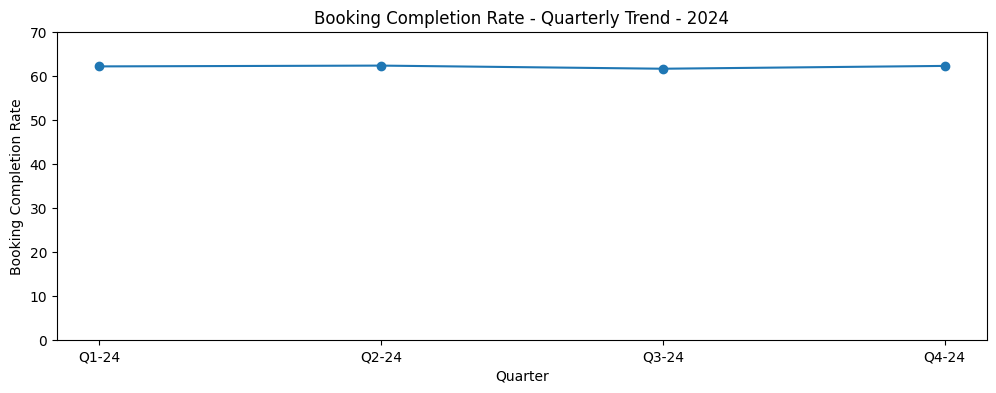

In [68]:
plt.figure(figsize=(12,4))
plt.plot(df_booking_completion_rate_quarterly['Quarter'],df_booking_completion_rate_quarterly['Booking Completion Rate'],marker='o')
plt.ylim(bottom=0,top=70)
plt.ylabel('Booking Completion Rate')
plt.xlabel('Quarter')
plt.title('Booking Completion Rate - Quarterly Trend - 2024')
plt.show()

### 6) Customer Ratings & Ratings

Definition: Monitors overall satisfaction and service quality from customer reviews and ratings. 

For this we are going to use the customer ratings column of the completed bookings only.

In [69]:
df_completed

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,316.0,4.85,4.1,4.6,UPI,2024,2,Feb,Q1-24
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,640.0,41.24,4.0,4.1,UPI,2024,6,Jun,Q2-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24


*Average Customer Rating for 2024*

In [70]:
print(f'Average Customer Rating - 2024: ',df_completed['Customer Rating'].mean().round(2))

Average Customer Rating - 2024:  4.4


*Highest and Lowest Customer Rating for 2024*

In [71]:
print(f'The highest rating for 2024 : ',df_completed['Customer Rating'].max())
print(f'The lowest rating for 2024 : ',df_completed['Customer Rating'].min())

The highest rating for 2024 :  5.0
The lowest rating for 2024 :  3.0


##### Analysis 6.1 - Average Customer Rating - Monthly Trend

*Aggregating the average ratings per month*

In [72]:
df_avg_ratings_monthly = df_completed.groupby(['Month Num','Month'])['Customer Rating'].mean().reset_index().round(2)
df_avg_ratings_monthly.rename(columns=({'Customer Rating' : 'Average Customer Rating'}),inplace=True)
df_avg_ratings_monthly


,Month Num,Month,Average Customer Rating
0,1,Jan,4.41
1,2,Feb,4.41
2,3,Mar,4.40
3,4,Apr,4.41
4,5,May,4.41
5,6,Jun,4.40
6,7,Jul,4.40
7,8,Aug,4.41
8,9,Sep,4.40
9,10,Oct,4.41


*Visualizing to find the monthly trend of Average Customer Rating*

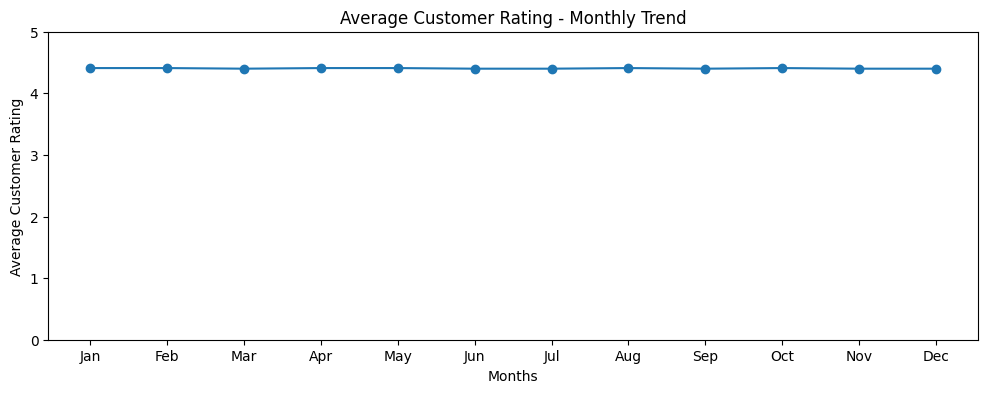

In [73]:
plt.figure(figsize=(12,4))
plt.plot(df_avg_ratings_monthly['Month'],df_avg_ratings_monthly['Average Customer Rating'],marker='o')
plt.ylim(bottom=0,top=5)
plt.ylabel('Average Customer Rating')
plt.xlabel('Months')
plt.title('Average Customer Rating - Monthly Trend')
plt.show()

##### Analysis 6.2 - Average Customer Rating - Quarterly Trend

*Aggregating the average ratings per quarter*

In [74]:
df_avg_ratings_quarterly = df.groupby('Quarter')['Customer Rating'].mean().reset_index().round(2)
df_avg_ratings_quarterly.rename(columns=({'Customer Rating':'Average Customer Rating'}),inplace=True)
df_avg_ratings_quarterly

,Quarter,Average Customer Rating
0,Q1-24,4.41
1,Q2-24,4.40
2,Q3-24,4.41
3,Q4-24,4.40


*Visualizing the quarterly trend using line chart*

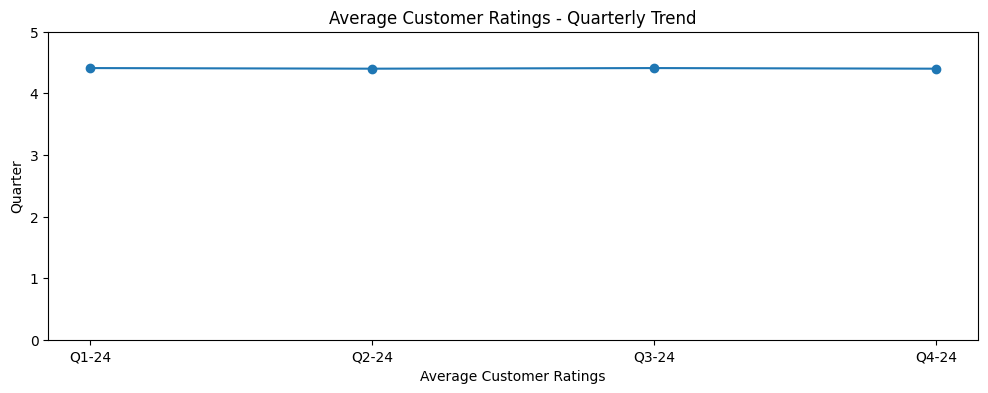

In [75]:
plt.figure(figsize=(12,4))
plt.plot(df_avg_ratings_quarterly['Quarter'],df_avg_ratings_quarterly['Average Customer Rating'],marker='o')
plt.ylim(bottom=0,top=5)
plt.ylabel('Quarter')
plt.xlabel('Average Customer Ratings')
plt.title('Average Customer Ratings - Quarterly Trend')
plt.show()

##### Analysis 6.3 - Categorizing Customer Ratings

The categorization which we are going to use for this is as follows

| Rating                        | Category                                                                 |
|-------------------------------|--------------------------------------------------------------------------|
| 5                          | Excellent                                                       |
| 4 - 4.9                             | Good                                                       |
| 3 - 3.9                     | Average                                   |
| 2 - 2.9               |Below Average |
| 1  - 1.9                     | Bad                                           |

In [76]:
df_customer_ratings_category_completed = df_completed.copy()
df_customer_ratings_category_completed

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,316.0,4.85,4.1,4.6,UPI,2024,2,Feb,Q1-24
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,640.0,41.24,4.0,4.1,UPI,2024,6,Jun,Q2-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24


In [77]:
def categorizer(rating):
    if rating == 5:
        return 'Excellent'
    elif rating >= 4 and rating < 5:
        return 'Good'
    elif rating >= 3 and rating < 4:
        return 'Average'
    elif rating >= 2 and rating < 3:
        return 'Below Average'
    else:
        return 'Bad'
df_customer_ratings_category_completed['Customer Rating Category'] = df_customer_ratings_category_completed['Customer Rating'].apply(categorizer)
df_customer_ratings_category_completed

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month Num,Month,Quarter,Customer Rating Category
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627.0,13.58,4.9,4.9,Debit Card,2024,8,Aug,Q3-24,Good
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416.0,34.02,4.6,5.0,UPI,2024,10,Oct,Q4-24,Excellent
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737.0,48.21,4.1,4.3,UPI,2024,9,Sep,Q3-24,Good
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,316.0,4.85,4.1,4.6,UPI,2024,2,Feb,Q1-24,Good
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,640.0,41.24,4.0,4.1,UPI,2024,6,Jun,Q2-24,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,475.0,40.08,3.7,4.1,Uber Wallet,2024,11,Nov,Q4-24,Good
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,1093.0,21.31,4.8,5.0,UPI,2024,11,Nov,Q4-24,Excellent
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,852.0,15.93,3.9,4.4,Cash,2024,9,Sep,Q3-24,Good
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,333.0,45.54,4.1,3.7,UPI,2024,10,Oct,Q4-24,Average


*Aggregating this information to a dataframe to know about the number of customers per category*

In [78]:
df_num_customers_per_rating_category = df_customer_ratings_category_completed.groupby('Customer Rating Category')['Customer ID'].nunique().reset_index()
df_num_customers_per_rating_category.rename(columns=({'Customer ID':'Number of Ratings'}),inplace=True)
df_num_customers_per_rating_category.sort_values(by='Number of Ratings',inplace=True)
df_num_customers_per_rating_category['Number of Ratings'] = df_num_customers_per_rating_category['Number of Ratings'] / 1000
df_num_customers_per_rating_category['Number of Ratings'] = df_num_customers_per_rating_category['Number of Ratings'].round(2)
df_num_customers_per_rating_category

,Customer Rating Category,Number of Ratings
1,Excellent,5.84
0,Average,12.90
2,Good,73.98


*Visualizing this information as a bar chart*

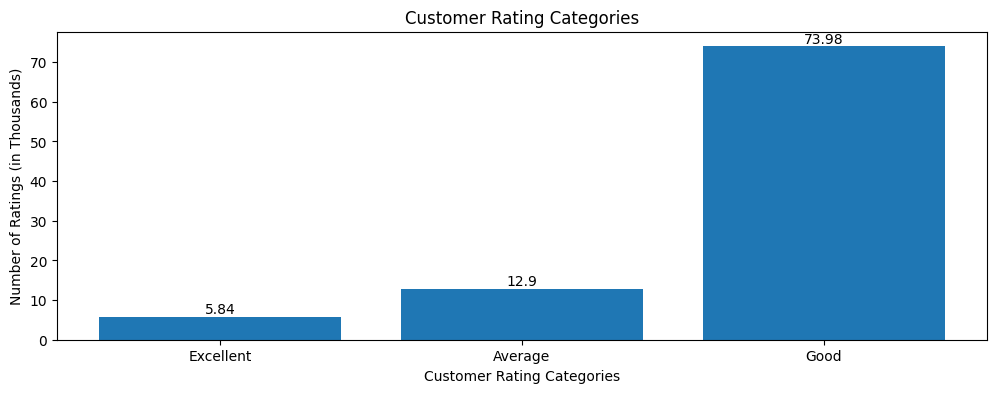

In [79]:
plt.figure(figsize=(12,4))
plt.bar(df_num_customers_per_rating_category['Customer Rating Category'],df_num_customers_per_rating_category['Number of Ratings'])
plt.ylabel('Number of Ratings (in Thousands)')
plt.xlabel('Customer Rating Categories')
plt.title('Customer Rating Categories')
for i in range(len(df_num_customers_per_rating_category)):
    x = i
    y = df_num_customers_per_rating_category['Number of Ratings'].iloc[i]
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------

### Additional Analysis - Payment Methods

*Distinct Payment Methods*

We are only going to include those bookings whose booking status is completed

In [80]:
completed_df['Payment Method'].unique()

array(['Debit Card', 'UPI', 'Cash', 'Uber Wallet', 'Credit Card'],
      dtype=object)

*Number of Transactions*

In [81]:
num_transactions_per_payment_method = completed_df.groupby('Payment Method')['Booking ID'].nunique().reset_index()
num_transactions_per_payment_method.rename(columns=({'Booking ID':'Number of Transactions'}),inplace=True)
num_transactions_per_payment_method.sort_values(by='Number of Transactions',ascending=False,inplace=True)
num_transactions_per_payment_method['Number of Transactions'] = num_transactions_per_payment_method['Number of Transactions']/1000
num_transactions_per_payment_method['Number of Transactions'] = num_transactions_per_payment_method['Number of Transactions'].round(2)
num_transactions_per_payment_method

,Payment Method,Number of Transactions
3,UPI,41.75
0,Cash,23.09
4,Uber Wallet,11.20
1,Credit Card,9.31
2,Debit Card,7.52


*Visualizing as a bar chart*

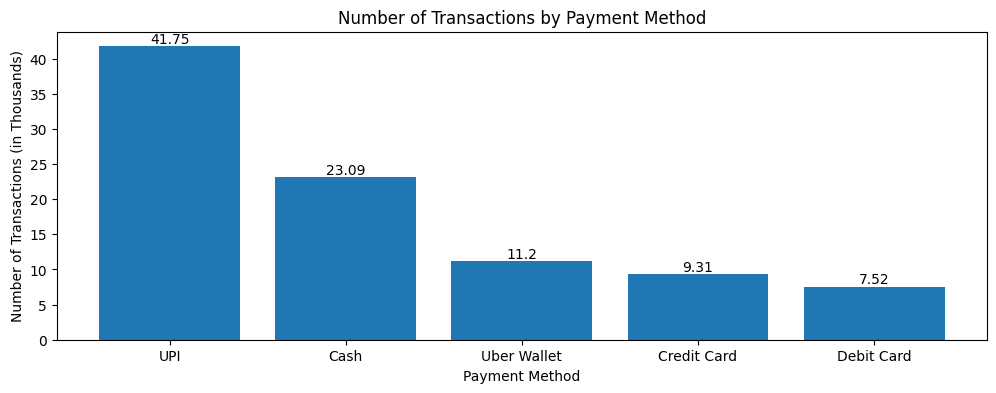

In [82]:
plt.figure(figsize=(12,4))
plt.bar(num_transactions_per_payment_method['Payment Method'],num_transactions_per_payment_method['Number of Transactions'])
for i in range(len(num_transactions_per_payment_method)):
    x = i 
    y = num_transactions_per_payment_method['Number of Transactions'].iloc[i]
    plt.text(x, y, y, ha='center', va='bottom')
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions (in Thousands)')
plt.show()

*Gross Bookings per Payment Method*

In [83]:
df_grossbookings_payment_method = df_completed.groupby('Payment Method')['Booking Value'].sum().reset_index()
df_grossbookings_payment_method.rename(columns=({'Booking Value':'Gross Bookings'}),inplace=True)
df_grossbookings_payment_method.sort_values(by='Gross Bookings',ascending=False,inplace=True)
df_grossbookings_payment_method['Gross Bookings'] = (df_grossbookings_payment_method['Gross Bookings'] / 1000000).round(2)
df_grossbookings_payment_method


,Payment Method,Gross Bookings
3,UPI,21.27
0,Cash,11.76
4,Uber Wallet,5.67
1,Credit Card,4.75
2,Debit Card,3.81


*Visualizing as a bar chart*

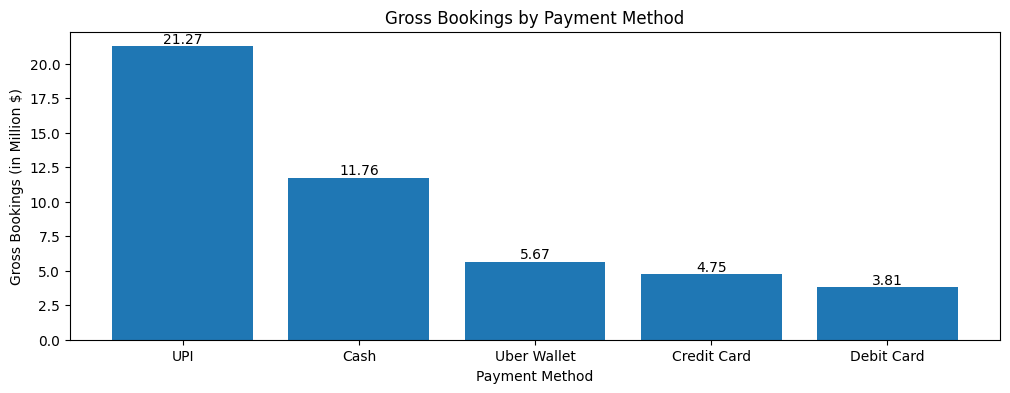

In [84]:
plt.figure(figsize=(12,4))
plt.bar(df_grossbookings_payment_method['Payment Method'],df_grossbookings_payment_method['Gross Bookings'])
for i in range(len(df_grossbookings_payment_method)):
    x = i 
    y = df_grossbookings_payment_method['Gross Bookings'].iloc[i]
    plt.text(x,y,y,ha='center', va='bottom')
plt.ylabel('Gross Bookings (in Million $)')
plt.xlabel('Payment Method')
plt.title('Gross Bookings by Payment Method')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------

### End of Notebook